In [ ]:
import pandas as pd
import pprint
import plotly.express as px
import numpy as np
from sklearn.manifold import TSNE
from scipy.stats import ttest_ind_from_stats
import re

In [ ]:
df_global_fr = pd.read_csv("/work/COVIDiSTRESS_cleaned.csv")
df_explain = pd.read_csv("/work/COVIDiSTRESS_explained.csv")

In [ ]:
# Attributes lists 
# Preparation before aggregation


scale_PSS10_UCLA = [s for s in df_global_fr.columns if "Scale_PSS10_UCLA" in s]
scale_SLON = [s for s in df_global_fr.columns if "Scale_SLON" in s]
OECD_institutions = [s for s in df_global_fr.columns if "OECD_insititutions" in s]
corona_concerns = [s for s in df_global_fr.columns if "Corona_concerns" in s]
compliance = [s for s in df_global_fr.columns if "Compliance" in s]
BFF_15 = [s for s in df_global_fr.columns if "BFF_15" in s]
expl_Distress = [s for s in df_global_fr.columns if "Expl_Distress" in s and s != "Expl_Distress_txt" ]
SPS = [s for s in df_global_fr.columns if "SPS" in s]
expl_Coping = [s for s in df_global_fr.columns if "Expl_Coping" in s]
expl_media = [s for s in df_global_fr.columns if "Expl_media" in s]
dem_riskgroup = ['Dem_riskgroup']
dem_islolation = ['Dem_islolation']

In [ ]:
df_global_fr.groupby(['Dem_state', 'RecordedDate'])[["Scale_PSS10_UCLA_avg", "Scale_SLON_avg"]].agg(["mean", "std", np.median, "count"]).sort_values(by=("Scale_PSS10_UCLA_avg", "count"), ascending=False)

Scale_PSS10_UCLA_avg                    \
                                                    mean       std  median   
Dem_state       RecordedDate                                                 
Bretagne        2020-03-31 17:01:21               0.6000  0.035355  0.6000   
Île-de-France   2020-04-01 04:00:52               0.5500  0.106066  0.5500   
Occitanie       2020-04-01 00:51:46               0.5250  0.000000  0.5250   
Île-de-France   2020-04-01 09:24:59               0.4375  0.053033  0.4375   
                2020-03-31 14:49:32               0.6125  0.017678  0.6125   
...                                                  ...       ...     ...   
Hauts-de-France 2020-03-31 09:45:38               0.5500       NaN  0.5500   
                2020-03-31 09:53:13               0.4000       NaN  0.4000   
                2020-03-31 09:58:11               0.4750       NaN  0.4750   
                2020-03-31 10:00:18               0.4500       NaN  0.4500   
Île-de-France   2020-05-27 13:08:39               0.4250       NaN  0.4250   

                                          Scale_SLON_avg                      \
                                    count           mean       std    median   
Dem_state       RecordedDate                                                   
Bretagne        2020-03-31 17:01:21     2       0.375000  0.058926  0.375000   
Île-de-France   2020-04-01 04:00:52     2       0.333333  0.353553  0.333333   
Occitanie       2020-04-01 00:51:46     2       0.291667  0.058926  0.291667   
Île-de-France   2020-04-01 09:24:59     2       0.250000  0.117851  0.250000   
                2020-03-31 14:49:32     2       0.333333  0.235702  0.333333   
...                                   ...            ...       ...       ...   
Hauts-de-France 2020-03-31 09:45:38     1       0.416667       NaN  0.416667   
                2020-03-31 09:53:13     1       0.500000       NaN  0.500000   
                2020-03-31 09:58:11     1       0.666667       NaN  0.666667   
                2020-03-31 10:00:18     1       0.250000       NaN  0.250000   
Île-de-France   2020-05-27 13:08:39     1       0.583333       NaN  0.583333   

                                           
                                    count  
Dem_state       RecordedDate               
Bretagne        2020-03-31 17:01:21     2  
Île-de-France   2020-04-01 04:00:52     2  
Occitanie       2020-04-01 00:51:46     2  
Île-de-France   2020-04-01 09:24:59     2  
                2020-03-31 14:49:32     2  
...                                   ...  
Hauts-de-France 2020-03-31 09:45:38     1  
                2020-03-31 09:53:13     1  
                2020-03-31 09:58:11     1  
                2020-03-31 10:00:18     1  
Île-de-France   2020-05-27 13:08:39     1  

[9478 rows x 8 columns]

In [ ]:
px.histogram(df_global_fr, x="Dem_edu_mom", color="Dem_gender")

In [ ]:
df_global_fr.Dem_edu_mom.value_counts(dropna=False)

College degree                3854
Up to 12 years of school      2263
Some College or equivalent    1317
Up to 9 years of school       1139
PhD/Doctorate                  523
Up to 6 years of school        407
Name: Dem_edu_mom, dtype: int64

In [ ]:
df_global_fr.shape

(9503, 114)

In [ ]:
col

['OECD_institutions_avg',
 'Scale_PSS10_UCLA_avg',
 'Scale_SLON_avg',
 'Corona_concerns_avg',
 'Compliance_avg',
 'BFF_15_avg',
 'expl_Distress15_avg',
 'SPS_avg',
 'expl_Coping_avg',
 'expl_media_avg']

<AxesSubplot:title={'center':'Correlation Heatmap'}>

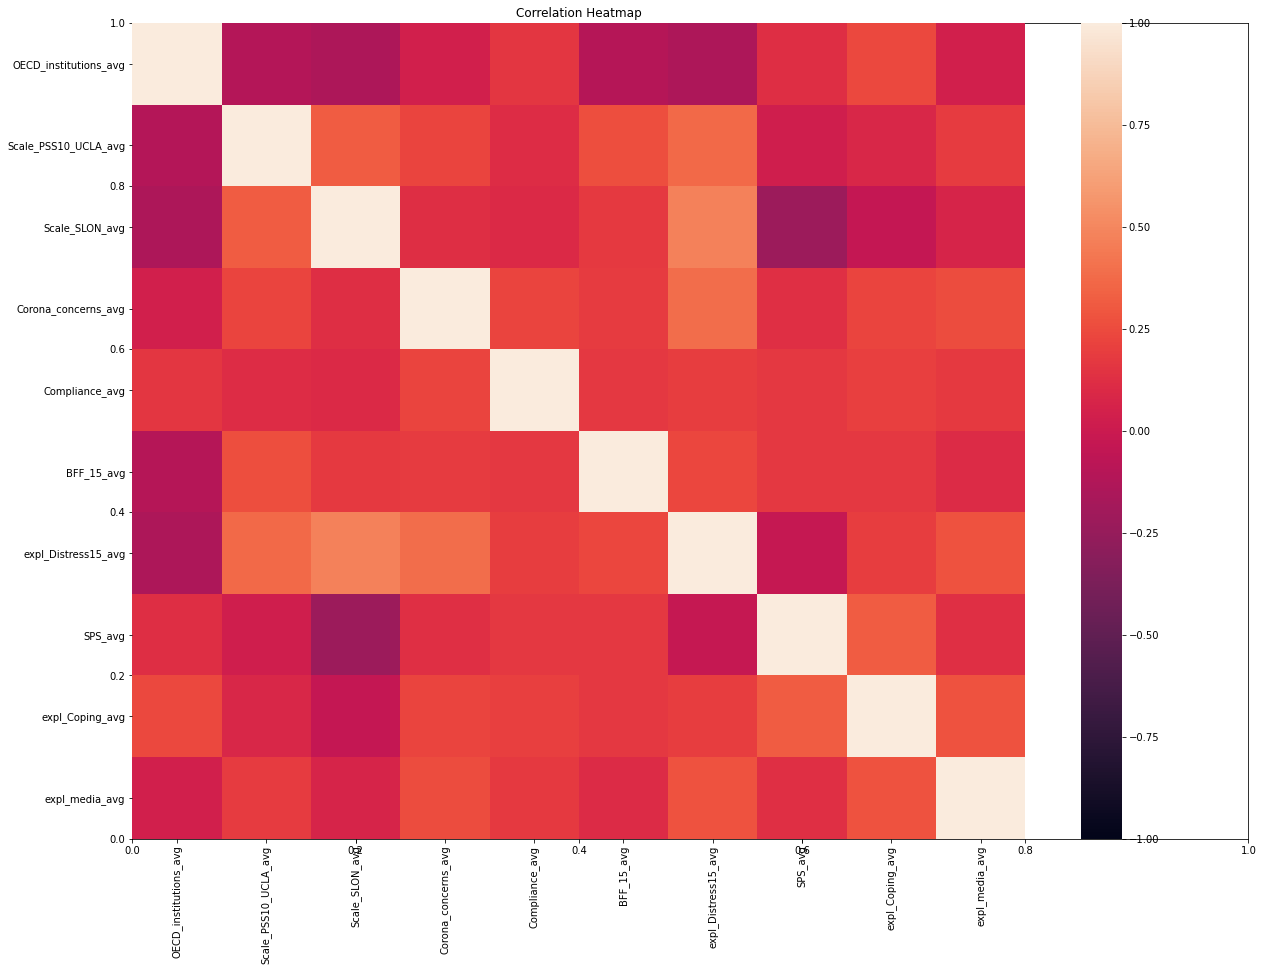

In [ ]:
import seaborn as sns # plot library.
import matplotlib.pyplot as plt # plot library
col = [s for s in df_global_fr.columns if "avg" in s]
corr = df_global_fr[col].corr()
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
sns.heatmap(corr, vmin=-1, vmax=1)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform (df_global_fr[sum([OECD_institutions, corona_concerns, compliance, BFF_15, expl_Distress, SPS,
                                                   expl_Coping, expl_media], [])])
print(X_embedded.shape)

(9503, 2)


In [ ]:
px.scatter(X_embedded, x=0, y=1, color=df_global_fr['Scale_PSS10_UCLA_avg'])

In [ ]:
px.scatter(X_embedded, x=0, y=1, color=df_global_fr['Scale_SLON_avg'])

check signicative attribute of a subgroup with t-test

In [ ]:
df_subgroup = df_global_fr.loc[X_embedded[:, 0] > 0]

In [ ]:
global_mean = df_global_fr[~df_global_fr.index.isin(df_subgroup.index)].mean()
global_std = df_global_fr[~df_global_fr.index.isin(df_subgroup.index)].std()
subgroup_mean = df_subgroup.mean()
subgroup_std = df_subgroup.std()
stats = []
pvalues = []
# Warning when interpretating remenber gaussian hypothesis is not respected for all field like ages
for col, mean1, std1, mean2, std2 in zip(global_mean.index, global_mean.values, global_std.values, subgroup_mean.values, subgroup_std.values):
    stat, pvalue = ttest_ind_from_stats(mean1, std1, df_global_fr.shape[0], mean2, std2, df_subgroup.shape[0])
    pvalues.append(pvalue)
    stats.append(stat)
sorted([(col, df_explain[col].iloc[0] if col in df_explain else "...", s, p) for col, p, s in zip(global_mean.index, pvalues, stats) if p<1e-5],
      key=lambda x: x[-2],
      reverse=True)[:10]

[('Expl_Coping_7',
  'I have found the following helpful for reducing feelings of discomfort during the Coronavirus situation - Video games (alone)',
  36.39952529873828,
  2.114933432065738e-277),
 ('Expl_Coping_8',
  'I have found the following helpful for reducing feelings of discomfort during the Coronavirus situation - Video games (online)',
  29.75243993533595,
  9.70540113776664e-189),
 ('BFF_15_6',
  'Finally, to finish the first part of the survey, please forget the Coronavirus situation for a moment, and think about yourself on normal days. \nI see myself as a person who... - ... is socially reserved.',
  24.32771472023155,
  4.16864365183284e-128),
 ('Scale_PSS10_UCLA_8',
  'In the last week, how often have you... - felt that you were on top of things?',
  23.673091796369484,
  1.5416842460967477e-121),
 ('BFF_15_14',
  'Finally, to finish the first part of the survey, please forget the Coronavirus situation for a moment, and think about yourself on normal days. \nI see myse

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee440d56-15d8-47e2-9125-c7817d63a1b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>